In [73]:
# Import Dependencies
import pandas as pd
from sqlalchemy import create_engine
from config import pg_pass
from config import pg_user
import psycopg2

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [74]:
# create house df from csv
house_csv = "resources/melb_data.csv"
house_df = pd.read_csv(house_csv)
house_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [75]:
# create venues df from csv
venue_csv = "resources/Melbourne_venues.csv"
venue_df = pd.read_csv(venue_csv)
venue_df.head()

,Unnamed: 0,Street,Suburb,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Anderson Rd,Albion,-37.7852,144.8272,Cố Đô Vietnamese Restaurant,-37.785639,144.831891,Vietnamese Restaurant
1,1,Anderson Rd,Albion,-37.7852,144.8272,Diamond Palace,-37.785903,144.831890,Chinese Restaurant
2,2,Anderson Rd,Albion,-37.7852,144.8272,Pho Hien Saigon,-37.784650,144.832178,Vietnamese Restaurant
3,3,Anderson Rd,Albion,-37.7852,144.8272,Fresh Chilli Deli,-37.783545,144.832313,Bakery
4,4,Anderson Rd,Albion,-37.7852,144.8272,Afghan Master Kebab,-37.784865,144.832678,Afghan Restaurant


In [76]:
# transform house table
house_mel = ["Suburb", "Address", "Price", "CouncilArea","Lattitude","Longtitude"]
melbourne_housing = house_df[house_mel].copy()

# check new list
melbourne_housing.head()

,Suburb,Address,Price,CouncilArea,Lattitude,Longtitude
0,Abbotsford,85 Turner St,1480000.0,Yarra,-37.7996,144.9984
1,Abbotsford,25 Bloomburg St,1035000.0,Yarra,-37.8079,144.9934
2,Abbotsford,5 Charles St,1465000.0,Yarra,-37.8093,144.9944
3,Abbotsford,40 Federation La,850000.0,Yarra,-37.7969,144.9969
4,Abbotsford,55a Park St,1600000.0,Yarra,-37.8072,144.9941


In [77]:
# Correct spelling mistakes
melbourne_housing= melbourne_housing.rename(columns={"Lattitude":"Latitude","Longtitude":"Longitude"} )
melbourne_housing.head()


,Suburb,Address,Price,CouncilArea,Latitude,Longitude
0,Abbotsford,85 Turner St,1480000.0,Yarra,-37.7996,144.9984
1,Abbotsford,25 Bloomburg St,1035000.0,Yarra,-37.8079,144.9934
2,Abbotsford,5 Charles St,1465000.0,Yarra,-37.8093,144.9944
3,Abbotsford,40 Federation La,850000.0,Yarra,-37.7969,144.9969
4,Abbotsford,55a Park St,1600000.0,Yarra,-37.8072,144.9941


In [112]:
# Mean data by suburb
house_by_suburb_df = melbourne_housing.groupby('Suburb').mean()
house_by_suburb_df.head()

,Price,Latitude,Longitude
Suburb,,,
Abbotsford,1.060366e+06,-37.804339,144.997176
Aberfeldie,1.277455e+06,-37.759280,144.897587
Airport West,7.566567e+05,-37.723399,144.879635
Albanvale,5.370833e+05,-37.745640,144.770878
Albert Park,1.941355e+06,-37.844127,144.953107


In [113]:
house_by_suburb_ordered_df = house_by_suburb_df.sort_values(by=["Price"])
house_by_suburb_ordered_df.head()

,Price,Latitude,Longitude
Suburb,,,
Bacchus Marsh,285000.000000,-37.673440,144.431810
Rockbank,340000.000000,-37.732890,144.666150
Kurunjang,353000.000000,-37.669238,144.591907
Wallan,366000.000000,-37.408530,144.977490
Melton South,380736.111111,-37.703511,144.573997


In [102]:
# Mean data by council area
house_by_suburb_df = melbourne_housing.groupby('CouncilArea').mean()
house_by_suburb_df.head()

,Price,Latitude,Longitude
CouncilArea,,,
Banyule,9.444280e+05,-37.740957,145.065046
Bayside,1.652168e+06,-37.926146,145.010322
Boroondara,1.647217e+06,-37.822077,145.062958
Brimbank,6.472007e+05,-37.767510,144.819741
Cardinia,5.731250e+05,-38.042975,145.426144


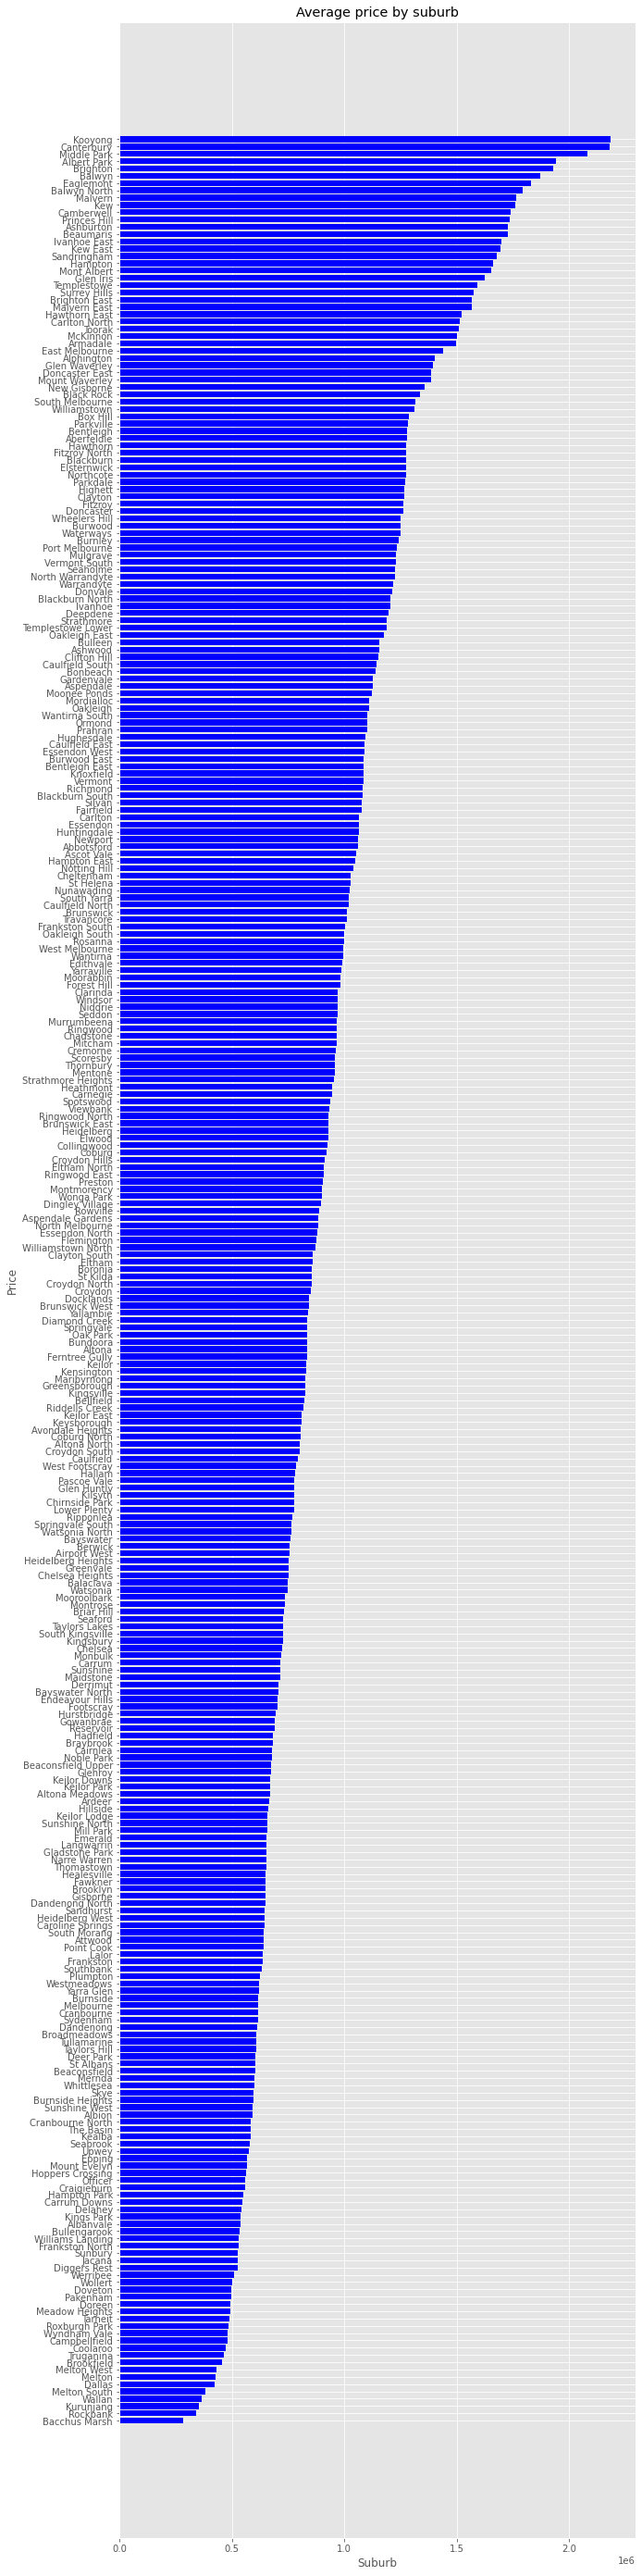

In [117]:
#x = np.array(house_by_suburb_ordered_df["Suburb"])
y = house_by_suburb_ordered_df["Price"]


fig = plt.figure(figsize=(10, 50))
  
plt.barh(y.keys(), y, color='blue')
  
plt.xlabel("Suburb")
plt.ylabel("Price")
plt.title("Average price by suburb")

plt.show()

In [81]:
# transform venue table
venue_melb= ["Suburb", "Venue Category", "Venue","Latitude","Longitude"]
melbourne_venue = venue_df[venue_melb].copy()

melbourne_venue

,Suburb,Venue Category,Venue,Latitude,Longitude
0,Albion,Vietnamese Restaurant,Cố Đô Vietnamese Restaurant,-37.7852,144.8272
1,Albion,Chinese Restaurant,Diamond Palace,-37.7852,144.8272
2,Albion,Vietnamese Restaurant,Pho Hien Saigon,-37.7852,144.8272
3,Albion,Bakery,Fresh Chilli Deli,-37.7852,144.8272
4,Albion,Afghan Restaurant,Afghan Master Kebab,-37.7852,144.8272
...,...,...,...,...,...
459,Toorak,Japanese Restaurant,Orita Japanese,-37.8421,145.0104
460,Toorak,Australian Restaurant,Quaff,-37.8421,145.0104
461,Toorak,Smoke Shop,Alexanders Cigar Merchants,-37.8421,145.0104
462,Toorak,Shopping Mall,Trak Centre,-37.8421,145.0104


In [82]:
melbourne_venue= melbourne_venue.rename(columns={"Venue Category":"Venuecategory"})
# melbourne_venue

In [83]:
# create engine for postgresql
rds_connection_string = (f'{pg_user}:{pg_pass}@localhost:5432/Melb_data_db')
engine = create_engine(f'postgresql://{rds_connection_string}')

In [84]:
# check table names
engine.table_names()

c:\Users\User\anaconda3\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  


['melbor_housing', 'melbor_venue', 'melbor_house', 'melbor_venhouse']

In [85]:
# Write records stored in a DataFrame to a SQL database
house_df.to_sql(name='melbor_housing', con=engine, if_exists='append', index=False)



In [86]:
melbourne_venue.to_sql(name='melbor_venue', con=engine, if_exists='append', index=False)

In [87]:
melbourne_housing.to_sql(name='melbo_house', con=engine, if_exists='append', index=False)

In [88]:
# Run query for venues
pd.read_sql_query('select * from melbor_venue', con=engine).head()

,Suburb,Venuecategory,Venue,Latitude,Longitude
0,Albion,Vietnamese Restaurant,Cố Đô Vietnamese Restaurant,-37.7852,144.8272
1,Albion,Chinese Restaurant,Diamond Palace,-37.7852,144.8272
2,Albion,Vietnamese Restaurant,Pho Hien Saigon,-37.7852,144.8272
3,Albion,Bakery,Fresh Chilli Deli,-37.7852,144.8272
4,Albion,Afghan Restaurant,Afghan Master Kebab,-37.7852,144.8272


In [89]:
# run query for housing
pd.read_sql_query('select * from melbo_house', con=engine).head()

,Suburb,Address,Price,CouncilArea,Latitude,Longitude
0,Abbotsford,85 Turner St,1480000.0,Yarra,-37.7996,144.9984
1,Abbotsford,25 Bloomburg St,1035000.0,Yarra,-37.8079,144.9934
2,Abbotsford,5 Charles St,1465000.0,Yarra,-37.8093,144.9944
3,Abbotsford,40 Federation La,850000.0,Yarra,-37.7969,144.9969
4,Abbotsford,55a Park St,1600000.0,Yarra,-37.8072,144.9941


In [90]:
# check number of times each suburb appears in the table for venues
melbourne_venue["Suburb"].value_counts()


Melbourne          200
Hawthorn            70
Carnegie            35
Footscray           27
Melton              27
Toorak              19
Albion              15
Glen Huntly          9
Murrumbeena          9
Caulfield            7
Kingsville           6
Ormond               6
Reservoir            6
Epping               5
Bacchus Marsh        5
Glen Iris            4
Caulfield East       4
Pascoe Vale          4
Caulfield South      3
Melton South         2
Glenroy              1
Name: Suburb, dtype: int64

In [91]:
# check number of times each suburb appears in the table for housing
melbourne_housing["Suburb"].value_counts()

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64

In [92]:
# Join the venue and housing tables
inner_join_df=pd.merge(melbourne_housing,melbourne_venue, on='Suburb', how='inner')
inner_join_df

,Suburb,Address,Price,CouncilArea,Latitude_x,Longitude_x,Venuecategory,Venue,Latitude_y,Longitude_y
0,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Japanese Restaurant,Shyun Japanese Restaurant,-37.88750,145.05990
1,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Burger Joint,Grill'd,-37.88750,145.05990
2,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Bagel Shop,Huff Bagelry,-37.88750,145.05990
3,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Korean Restaurant,Mrs Kim's Grill,-37.88750,145.05990
4,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Bakery,Koornang Hot Bread,-37.88750,145.05990
...,...,...,...,...,...,...,...,...,...,...
40010,Bacchus Marsh,4 Lidgett St,285000.0,Moorabool,-37.67344,144.43181,Café,Baby Black Espresso Bar,-37.67344,144.43181
40011,Bacchus Marsh,4 Lidgett St,285000.0,Moorabool,-37.67344,144.43181,Supermarket,Foodworks,-37.67344,144.43181
40012,Bacchus Marsh,4 Lidgett St,285000.0,Moorabool,-37.67344,144.43181,Fast Food Restaurant,Kfc Bacchus Marsh,-37.67344,144.43181
40013,Bacchus Marsh,4 Lidgett St,285000.0,Moorabool,-37.67344,144.43181,Fast Food Restaurant,McDonald's,-37.67344,144.43181


In [93]:
# check value_counts for suburbs 
inner_join_df["Suburb"].value_counts()

Hawthorn           13370
Melbourne           9200
Carnegie            5110
Footscray           3564
Reservoir           2154
Toorak              1900
Glen Iris            780
Murrumbeena          738
Pascoe Vale          684
Albion               615
Ormond               498
Melton               324
Epping               260
Kingsville           204
Glenroy              159
Glen Huntly          153
Caulfield South      141
Caulfield             84
Caulfield East        36
Melton South          36
Bacchus Marsh          5
Name: Suburb, dtype: int64

In [94]:
# check value_counts for venue categories
inner_join_df["Venuecategory"].value_counts()

Café                   4938
Japanese Restaurant    1829
Coffee Shop            1456
Korean Restaurant      1311
Pizza Place            1140
                       ... 
Electronics Store        12
Pharmacy                 12
Bus Station              12
Train                     9
Rental Car Location       9
Name: Venuecategory, Length: 127, dtype: int64

In [95]:
# Venues type and avverage price of housing table
Summary_stat_df= inner_join_df.groupby(["Suburb","Venuecategory"])

Summary_stat_df.head()

,Suburb,Address,Price,CouncilArea,Latitude_x,Longitude_x,Venuecategory,Venue,Latitude_y,Longitude_y
0,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Japanese Restaurant,Shyun Japanese Restaurant,-37.88750,145.05990
1,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Burger Joint,Grill'd,-37.88750,145.05990
2,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Bagel Shop,Huff Bagelry,-37.88750,145.05990
3,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Korean Restaurant,Mrs Kim's Grill,-37.88750,145.05990
4,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Bakery,Koornang Hot Bread,-37.88750,145.05990
...,...,...,...,...,...,...,...,...,...,...
40010,Bacchus Marsh,4 Lidgett St,285000.0,Moorabool,-37.67344,144.43181,Café,Baby Black Espresso Bar,-37.67344,144.43181
40011,Bacchus Marsh,4 Lidgett St,285000.0,Moorabool,-37.67344,144.43181,Supermarket,Foodworks,-37.67344,144.43181
40012,Bacchus Marsh,4 Lidgett St,285000.0,Moorabool,-37.67344,144.43181,Fast Food Restaurant,Kfc Bacchus Marsh,-37.67344,144.43181
40013,Bacchus Marsh,4 Lidgett St,285000.0,Moorabool,-37.67344,144.43181,Fast Food Restaurant,McDonald's,-37.67344,144.43181


In [96]:
# Number of venues by catergory per suburb
Summary_stat_df["Suburb"].value_counts()

Suburb  Venuecategory        Suburb
Albion  Afghan Restaurant    Albion     41
        Asian Restaurant     Albion     41
        Bakery               Albion     41
        Café                 Albion     41
        Chinese Restaurant   Albion     82
                                      ... 
Toorak  Italian Restaurant   Toorak    100
        Japanese Restaurant  Toorak    100
        Rock Club            Toorak    100
        Shopping Mall        Toorak    200
        Smoke Shop           Toorak    100
Name: Suburb, Length: 271, dtype: int64

In [97]:
suburb_list=['Hawthorn','Melbourne','Carnegie','Footscray',
            'Reservoir','Toorak','Glen Iris','Murrumbeena',
            'Pascoe Vale','Albion','Ormond','Melton','Epping',
            'Kingsville' ,'Glenroy','Glen Huntly','Caulfield South',
            'Caulfield','Caulfield East','Bacchus Marsh']

suburb_df=inner_join_df[inner_join_df["Suburb"].isin(suburb_list)]
suburb_df

,Suburb,Address,Price,CouncilArea,Latitude_x,Longitude_x,Venuecategory,Venue,Latitude_y,Longitude_y
0,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Japanese Restaurant,Shyun Japanese Restaurant,-37.88750,145.05990
1,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Burger Joint,Grill'd,-37.88750,145.05990
2,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Bagel Shop,Huff Bagelry,-37.88750,145.05990
3,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Korean Restaurant,Mrs Kim's Grill,-37.88750,145.05990
4,Carnegie,1/60 Moonya Rd,820000.0,Glen Eira,-37.89700,145.06230,Bakery,Koornang Hot Bread,-37.88750,145.05990
...,...,...,...,...,...,...,...,...,...,...
40010,Bacchus Marsh,4 Lidgett St,285000.0,Moorabool,-37.67344,144.43181,Café,Baby Black Espresso Bar,-37.67344,144.43181
40011,Bacchus Marsh,4 Lidgett St,285000.0,Moorabool,-37.67344,144.43181,Supermarket,Foodworks,-37.67344,144.43181
40012,Bacchus Marsh,4 Lidgett St,285000.0,Moorabool,-37.67344,144.43181,Fast Food Restaurant,Kfc Bacchus Marsh,-37.67344,144.43181
40013,Bacchus Marsh,4 Lidgett St,285000.0,Moorabool,-37.67344,144.43181,Fast Food Restaurant,McDonald's,-37.67344,144.43181


In [98]:
inner_join_df.to_sql(name='melbor_venhouse', con=engine, if_exists='append', index=False)